In [76]:
import src.lower_bound_baa_optimization
import src.compute_lower_bounds
import time
import numpy as np

ModuleNotFoundError: No module named 'code_for_lower_bounds'

In [2]:
K_MAX = 128
R_MAX = 1024
Z_MAX = 1024
compute_lower_bounds.compute_RZK_table_PRC(R_MAX, Z_MAX, K_MAX)

Generating cache table of size 1024x1024x128 (~27.0 bits)...


100%|█████████████████████████████████████████████████████████████████████████████| 1023/1023 [00:00<00:00, 5849.55it/s]

Done. Table generation took 4.6 seconds


In [3]:
# t0 = time.time()
# l = 0.19
# L_val = 7.72 / l
# beta = 0.438 * l * L_val
# dist = lower_bound_baa_optimization.generate_optimized_distribution(l=l, 
#                                                                     L_target=L_val, 
#                                                                     beta=beta, 
#                                                                     step_limit=1000, 
#                                                                     delta=1E-4, 
#                                                                     verbose=False)
# d2 = np.concatenate(([0], dist[:-1]), axis=0)
# rd = compute_lower_bounds.RunDistribution(d2, l)
# print(l, L_val * l, beta / (l * L_val), rd.compute_lower_bound() / l, time.time() - t0)

In [88]:
def accept_params(params):
    return (0.1 < params[0] < 0.25) and (5 < params[1] < 10) and (0.2 < params[2] < 1)

def foo(params):
    if not accept_params(params):
        return 0.0
    rd = get_rd(params)
    return rd.compute_lower_bound() / rd.lam

def get_rd(params, step_limit=1000):
    lam = params[0]
    L_val = params[1] / lam
    beta = params[2] * lam * L_val
    dist = lower_bound_baa_optimization.generate_optimized_distribution(l=lam, 
                                                                        L_target=L_val, 
                                                                        beta=beta, 
                                                                        step_limit=step_limit, 
                                                                        delta=1E-4, 
                                                                        verbose=True)
    d2 = np.concatenate(([0], dist[:-1]), axis=0)
    rd = compute_lower_bounds.RunDistribution(d2, lam)
    return rd

In [5]:
from scipy import optimize

In [6]:
history = []
def hist_foo(params):
    global history
    print(params, end=' ')
    t0 = time.time()
    res = foo(params)
    runtime = time.time()-t0
    print(res, runtime)
    history.append({'input':params, 'output':res, 'runtime':runtime})
    return -res


In [7]:
optimize.basinhopping(hist_foo, (0.19, 7.72, 0.438), niter=20)

[0.19  7.72  0.438] 0.12208469671934222 5.650966167449951
[0.19000001 7.72       0.438     ] 0.12208469672674838 5.657209873199463
[0.19       7.72000001 0.438     ] 0.12208469672050219 5.832273483276367
[0.19       7.72       0.43800001] 0.12208469671781075 6.37131929397583
[0.19049702 7.72007784 0.43789722] 0.12208495121897811 6.217270851135254
[0.19049703 7.72007784 0.43789722] 0.12208495122580876 6.1692376136779785
[0.19049702 7.72007786 0.43789722] 0.12208495122012607 6.780091762542725
[0.19049702 7.72007784 0.43789724] 0.12208495121759626 6.506312608718872
[0.19248509 7.72038922 0.43748612] 0.12208576819427339 6.809873819351196
[0.19248511 7.72038922 0.43748612] 0.12208576819879262 6.510616779327393
[0.19248509 7.72038924 0.43748612] 0.12208576819543467 5.692599534988403
[0.19248509 7.72038922 0.43748614] 0.12208576819345104 7.866947650909424
[0.19648044 7.72109429 0.43667957] 0.12208643896708431 5.978623867034912
[0.19648045 7.72109429 0.43667957] 0.12208643896708193 5.679668426

                        fun: -0.12208784705024857
 lowest_optimization_result:       fun: -0.12208784705024857
 hess_inv: array([[ 10.1136001 ,  -7.04416135,  -1.30366842],
       [ -7.04416135, 359.37379529,  -7.60232502],
       [ -1.30366842,  -7.60232502,   8.84909912]])
      jac: array([-2.90293247e-06, -1.60001218e-06, -2.48663127e-06])
  message: 'Optimization terminated successfully.'
     nfev: 68
      nit: 14
     njev: 17
   status: 0
  success: True
        x: array([0.19631126, 7.75705168, 0.43621946])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 148
                        nit: 20
                       njev: 37
                    success: True
                          x: array([0.19631126, 7.75705168, 0.43621946])

{'input': array([0.19631128, 7.75705168, 0.43621946]),
 'output': 0.12208784705029183,
 'runtime': 5.756363868713379}

In [16]:
best = max(history, key=lambda h: h['output'])
print(best)
rd = get_rd(best['input'])

{'input': array([0.19631128, 7.75705168, 0.43621946]), 'output': 0.12208784705029183, 'runtime': 5.756363868713379}


In [17]:
lb = rd.compute_lower_bound()

In [18]:
lb / rd.lam

0.12208784705029183

In [19]:
rd2 = get_rd(best['input'], 10000)

/mnt/d/Work/Current Projects/BDC/Better Lower Bounds/code_for_lower_bounds/lower_bound_baa_optimization.py:65: RuntimeWarning: divide by zero encountered in log
  return np.sum(P_ji * np.log(Q * P_ji / denominator), axis=0) - beta * D_i
/mnt/d/Work/Current Projects/BDC/Better Lower Bounds/code_for_lower_bounds/lower_bound_baa_optimization.py:11: RuntimeWarning: divide by zero encountered in log
  log_alphas = np.log(alphas) + power
/mnt/d/Work/Current Projects/BDC/Better Lower Bounds/code_for_lower_bounds/lower_bound_baa_optimization.py:106: RuntimeWarning: divide by zero encountered in true_divide
  d = np.max(np.log(Q / next_Q))
/mnt/d/Work/Current Projects/BDC/Better Lower Bounds/code_for_lower_bounds/lower_bound_baa_optimization.py:106: RuntimeWarning: invalid value encountered in true_divide
  d = np.max(np.log(Q / next_Q))


In [20]:
lb2 = rd2.compute_lower_bound()

In [21]:
lb2 / rd2.lam

0.12213491070378951

In [22]:
rd_base = get_rd([0.19, 7.72, 0.438], 10000)

In [80]:
rd_base2 = get_rd([0.19, 7.72, 0.438], 10000)

/mnt/d/Work/Current Projects/BDC/Better Lower Bounds/code_for_lower_bounds/lower_bound_baa_optimization.py:65: RuntimeWarning: divide by zero encountered in log
  return np.sum(P_ji * np.log(Q * P_ji / denominator), axis=0) - beta * D_i
/mnt/d/Work/Current Projects/BDC/Better Lower Bounds/code_for_lower_bounds/lower_bound_baa_optimization.py:11: RuntimeWarning: divide by zero encountered in log
  log_alphas = np.log(alphas) + power
/mnt/d/Work/Current Projects/BDC/Better Lower Bounds/code_for_lower_bounds/lower_bound_baa_optimization.py:106: RuntimeWarning: divide by zero encountered in true_divide
  d = np.max(np.log(Q / next_Q))
/mnt/d/Work/Current Projects/BDC/Better Lower Bounds/code_for_lower_bounds/lower_bound_baa_optimization.py:106: RuntimeWarning: invalid value encountered in true_divide
  d = np.max(np.log(Q / next_Q))


In [24]:
lb_base = rd_base.compute_lower_bound()

In [26]:
print(lb_base / rd_base.lam)

0.1221362491219246


In [27]:
from matplotlib import pyplot as plt

In [77]:
rd_base.distribution

array([1.00000000e-30, 1.00000000e-30, 1.00000000e-30, 1.00000000e-30,
       1.00000000e-30, 1.00000000e-30, 1.00000000e-30, 1.00000000e-30,
       1.00000000e-30, 1.00000000e-30, 1.00000000e-30, 9.06025926e-12,
       6.07866092e-03, 4.91328264e-01, 2.54388887e-03, 8.38654981e-08,
       4.50333595e-13, 3.45016509e-18, 1.44707279e-22, 6.86568704e-26,
       4.85798607e-28, 4.94220565e-29, 5.67539478e-29, 5.11070872e-28,
       2.36171749e-26, 3.61401936e-24, 1.20322075e-21, 5.95514139e-19,
       3.15329094e-16, 1.36243653e-13, 3.88787047e-11, 6.28053279e-09,
       5.18968594e-07, 2.07697127e-05, 3.96733578e-04, 3.68331556e-03,
       1.73681593e-02, 4.43074327e-02, 6.59990164e-02, 6.24355022e-02,
       4.09274048e-02, 2.02688908e-02, 8.23702340e-03, 2.96510583e-03,
       1.01253592e-03, 3.48116760e-04, 1.26657634e-04, 5.07577035e-05,
       2.30946635e-05, 1.21854731e-05, 7.55065491e-06, 5.52215668e-06,
       4.75864443e-06, 4.79643719e-06, 5.58752597e-06, 7.40676494e-06,
      

In [78]:
import pickle

In [79]:
with open('temp.pkl', 'wb') as f:
    pickle.dump(rd_base.distribution, f)

In [81]:
rd_base.distribution - rd_base2.distribution

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [84]:
np.sum(np.abs(rd_base.distribution - pickle.load(open('examples/temp2.pkl', 'rb'))))

1.1467536614647105

In [86]:
rd_base.distribution.dtype

dtype('float64')

In [87]:
pickle.load(open('examples/temp2.pkl', 'rb')).dtype

dtype('float64')

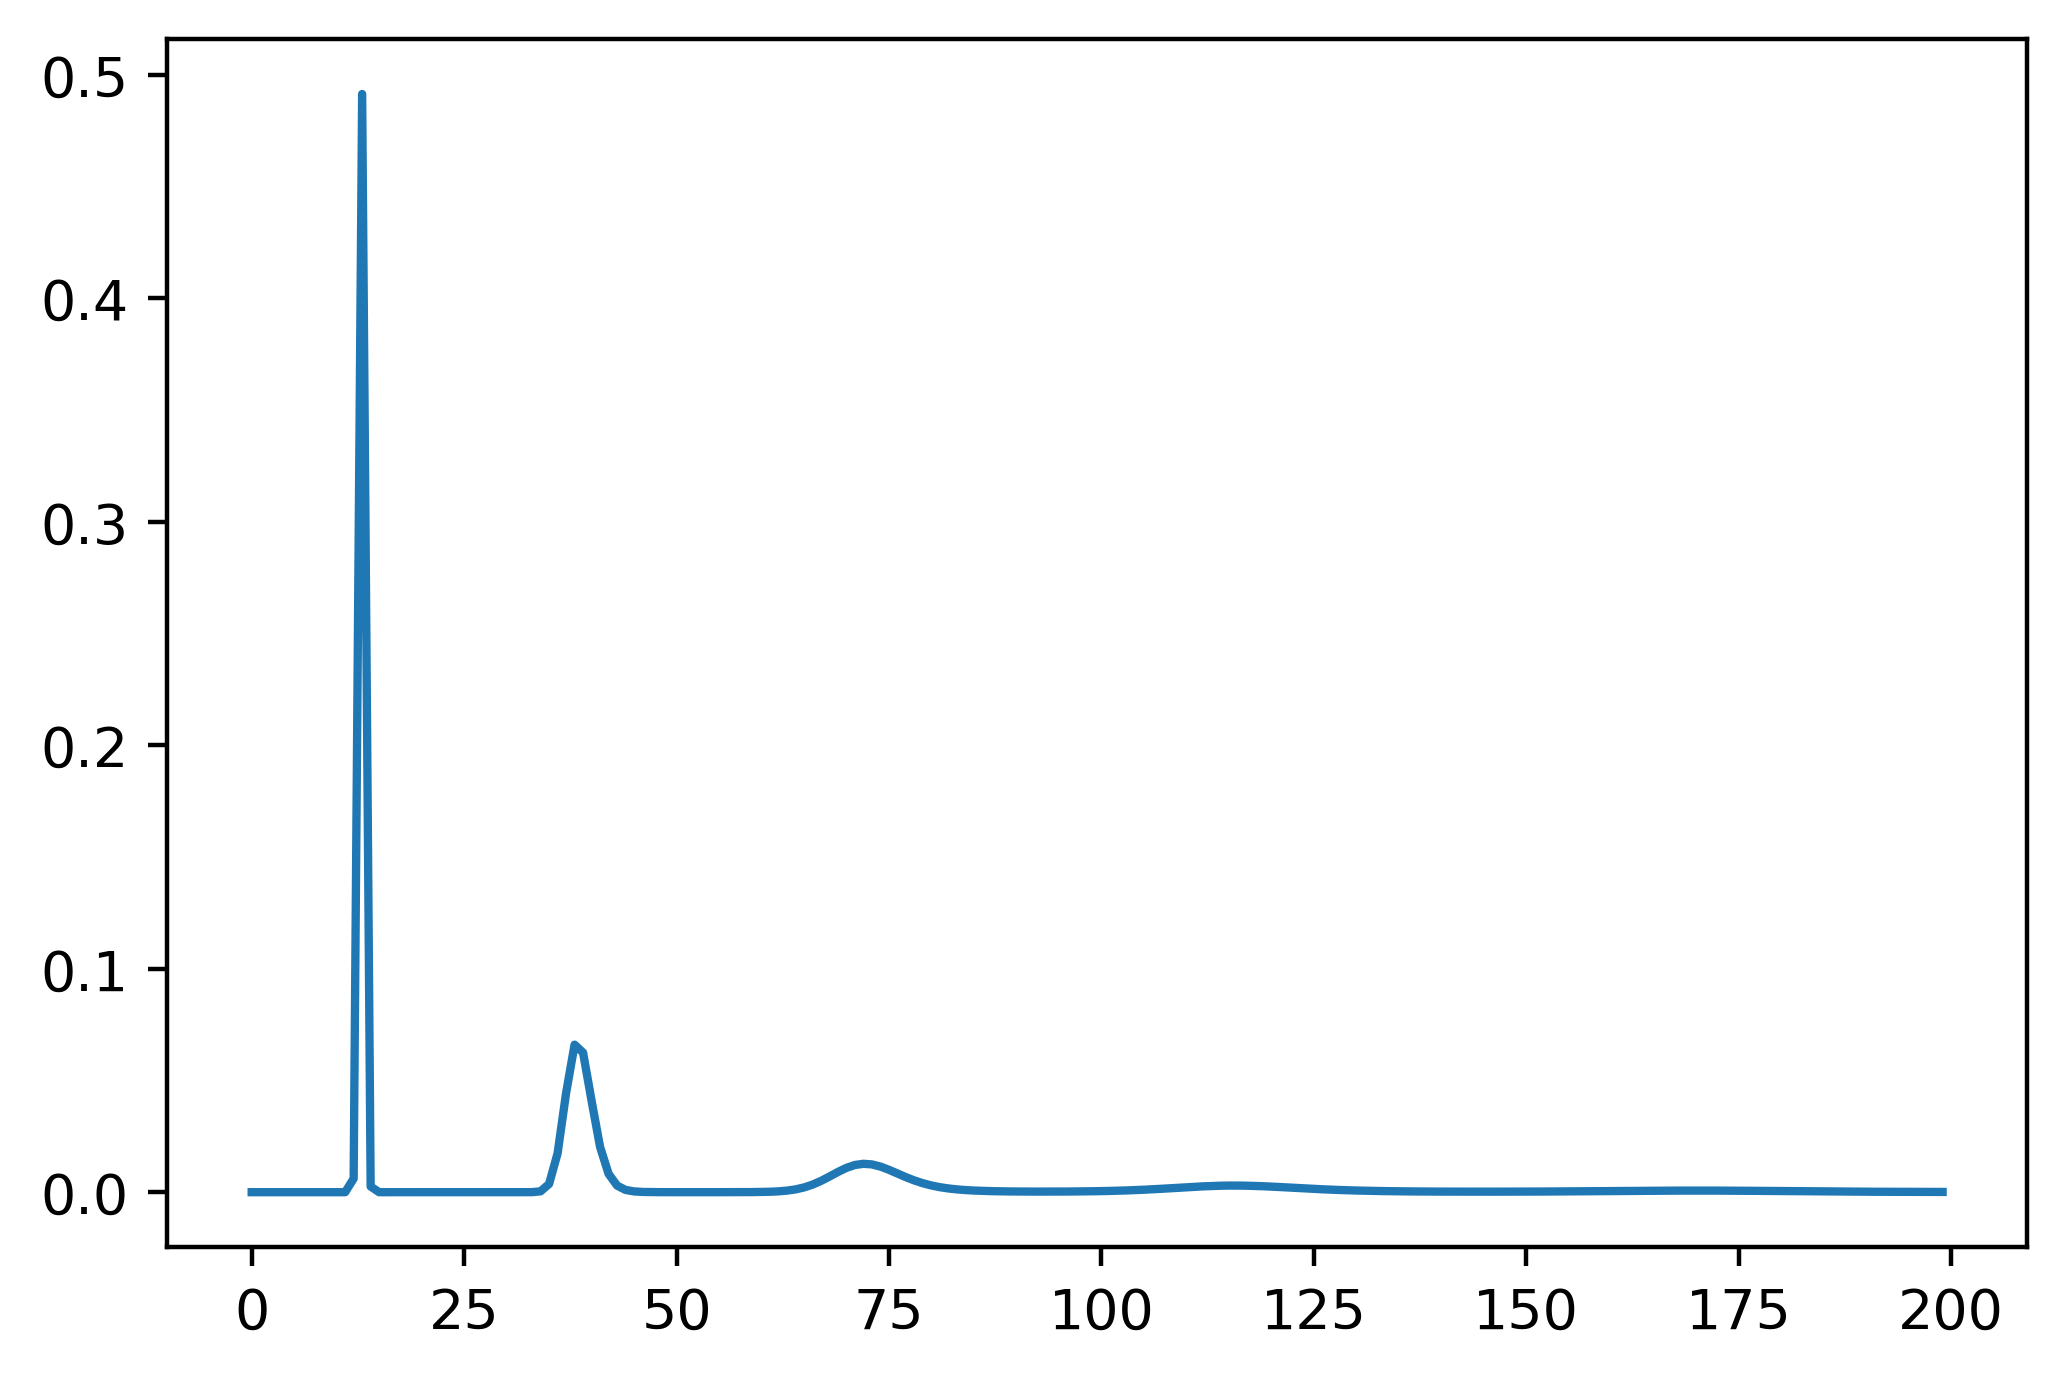

In [33]:
fig = plt.figure(dpi=400)
plt.plot(rd_base.distribution[:200])
# plt.yscale('log')
# plt.ylim(1E-3, 1)

In [34]:
np.sum(rd_base.distribution)

0.999930494874877

In [35]:
np.sum(rd_base.k_dist)

0.9999239877592374

In [37]:
1 - (_35/_34)

6.507567948843551e-06

In [38]:
from scipy import stats

In [45]:
ps = np.array([(np.exp(-rd_base.lam*i)) for i in range(len(rd_base.distribution))])
p_ents = np.array([stats.bernoulli(p).entropy() for p in ps])

In [49]:
np.dot(ps, rd_base.distribution)

0.04254097872185491

In [48]:
np.dot(p_ents, rd_base.distribution) / rd_base.average_length

0.0036101211058664055

In [51]:
np.exp(-np.infty)

0.0

In [53]:
np.exp(np.inf)

inf

In [63]:
m = np.array([[1., 0], [2, 3]])
np.log2(m, out=-np.inf * np.ones(np.shape(m)), where=(m!=0))

array([[0.       ,      -inf],
       [1.       , 1.5849625]])

In [61]:
np.ones_like?

In [68]:
np.nan_to_num?

In [66]:
np.inf + (np.inf - np.inf)

nan

In [67]:
5000000-np.inf

-inf

In [69]:
a = np.array([0, 1, -10])

In [70]:
arr = np.random.randint(0, 3, (2, 2))

In [71]:
arr

array([[0, 2],
       [1, 0]])

In [72]:
a[arr]

array([[  0, -10],
       [  1,   0]])

In [73]:
b = a[arr]

In [74]:
b[b < 0] = -1

In [75]:
b

array([[ 0, -1],
       [ 1,  0]])